In [48]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from queue import Queue

In [49]:
with open("d12.txt", "r") as f:
    txt = f.read()
    lines = []
    for row, txt_line in enumerate(txt.split("\n")):
        line = []
        for col, char in enumerate(txt_line):
            if char == 'S':
                char = 'a'
                start = row, col
            elif char == 'E':
                char = 'z'    
                stop = row, col
            line.append(ord(char)-ord("a"))
        lines.append(line)
    m = np.array(lines)
start, stop

((20, 0), (20, 139))

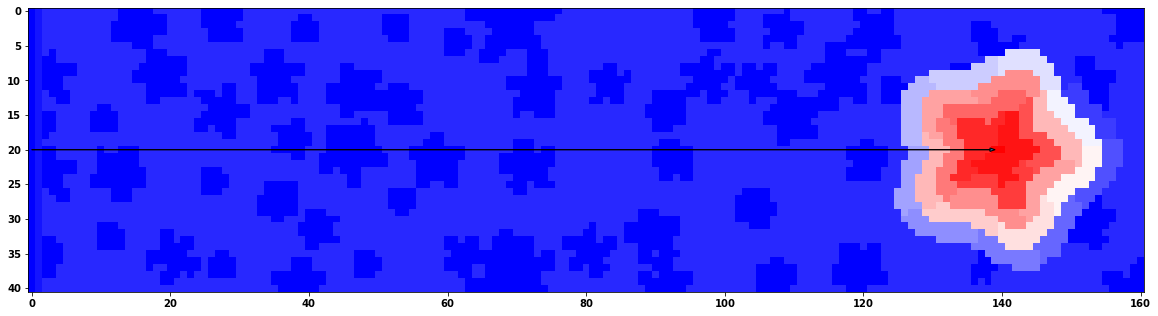

In [50]:
plt.figure(figsize = (20, 10))
plt.imshow(m, interpolation='nearest', cmap=plt.cm.bwr);
plt.arrow(start[1], start[0], stop[1]-start[1], stop[0]-start[0], head_width=0.5, length_includes_head=True);

## Reduce m-size for training

In [51]:
# m = m[19:26, 135:145]
# start = (6, 3)
# stop = (1, 5)
# plt.figure(figsize = (5, 4))
# plt.imshow(m, interpolation='nearest', cmap=plt.cm.bwr);
# plt.arrow(start[1], start[0], stop[1]-start[1], stop[0]-start[0], head_width=0.3, length_includes_head=True);
# 
# pd.DataFrame(m)

In [52]:
class Node:
    __id = -1
    @classmethod
    def __get_id(cls):
        cls.__id += 1
        return cls.__id
        
    def __init__(self, pos, parent = None):
        self.id = self.__get_id()
        self.pos = pos      # row, col
        self.parent = parent
        
    def __repr__(self):
        return f"N{self.id}"
    
def get_successors(pos):
    succs = []
    row, col = pos
    neighbours = [(row+1, col), (row, col+1)]
    if row > 0:
        neighbours.append((row-1, col))
    if col > 0:
        neighbours.append((row, col-1))
    for neighbour in neighbours:
        try:
            if m[neighbour] - m[pos] <= 1:
                succs.append(neighbour)
        except IndexError:
            pass
    return succs
                 
def deapth_first_search(start_pos, destination):
    fifo = Queue()
    fifo.put(Node(pos=start_pos))
    visited = [start_pos]
    run = 0
    t0 = time.time()
    while not fifo.empty():
        current_node = fifo.get()
        if current_node.pos == destination:
            print(f"Success! In {run=}, {time.time()-t0 :.1f}s")
            return current_node
        for child in get_successors(current_node.pos):
            if child not in visited:
                visited.append(child)
                fifo.put(Node(pos=child, parent=current_node))
        run += 1
    print("Stop not found!")
    return visited
    
    
def get_family_tree(node):
    xs, ys = [], []
    def __get_predesessor(node):
        xs.append(node.pos[1])
        ys.append(node.pos[0])
        if node.parent is not None:
            __get_predesessor(node.parent)
    __get_predesessor(node)
    return xs, ys
    

In [53]:
res = deapth_first_search(start, stop)
res

Success! In run=6542, 3.4s


N6542

In [54]:
xs, ys = get_family_tree(res)
f"the solution is: {len(xs)-1}"

'the solution is: 481'

In [55]:
%matplotlib inline
#%matplotlib qt

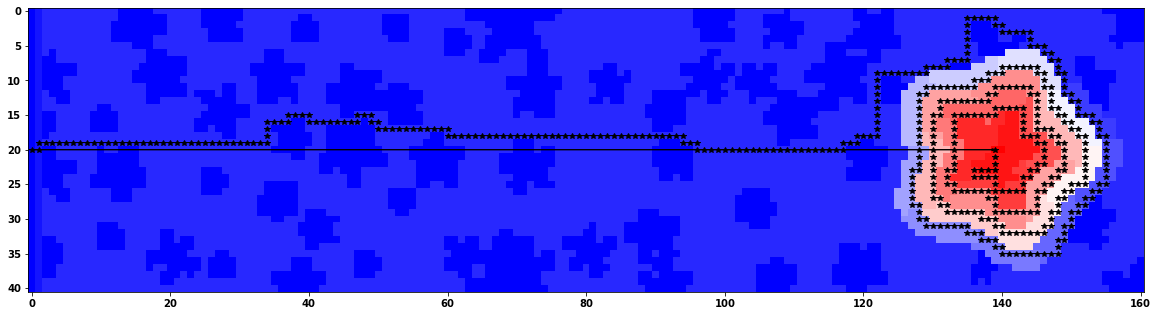

In [56]:
plt.figure(figsize = (20, 10))
plt.imshow(m, interpolation='nearest', cmap=plt.cm.bwr);
plt.arrow(start[1], start[0], stop[1]-start[1], stop[0]-start[0],head_width=0.3, length_includes_head=True)
plt.plot(xs, ys, "*k");